In [11]:

import  matplotlib.pyplot as plt
import pandas as pd
import datetime



pd.set_option("display.max_columns",50)

train_bank = pd.read_csv('./train_public.csv')

print(train_bank.shape)
train_bank.head()

(10000, 39)


,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,house_exist,censor_status,issue_date,use,post_code,region,debt_loan_ratio,del_in_18month,scoring_low,scoring_high,known_outstanding_loan,known_dero,pub_dero_bankrup,recircle_b,recircle_u,initial_list_status,app_type,earlies_credit_mon,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault
0,1040418,240418,31818.18182,3,11.466,1174.91,C,政府机构,金融业,3 years,0,1,2016/10/1,2,193,13,2.430000,0,556.363636,649.090909,3,0,0.0,7734.230769,91.800000,0,0,1-Dec,5,1,1.0,0.0,4.0,5.0,4.0,3,9927,0.0,0
1,1025197,225197,28000.00000,5,16.841,670.69,C,政府机构,金融业,10+ years,0,2,2013/6/1,0,491,30,11.004545,1,715.000000,893.750000,3,0,0.0,31329.000000,54.800000,1,0,Apr-90,40642,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,0
2,1009360,209360,17272.72727,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,1,0,2014/1/1,4,459,8,6.409091,0,774.545455,903.636364,5,0,0.0,18514.000000,57.692308,1,0,Oct-91,154,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,0
3,1039708,239708,20000.00000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,0,1,2015/7/1,0,157,8,9.204545,0,750.000000,875.000000,3,0,0.0,20707.000000,42.600000,0,0,1-Jun,0,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,0
4,1027483,227483,15272.72727,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,2,1,2016/7/1,0,38,21,15.578182,0,609.090909,710.606061,15,0,0.0,14016.153850,30.461538,0,0,2-May,0,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,0


<AxesSubplot:ylabel='isDefault'>

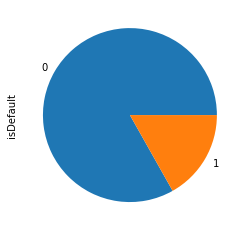

In [12]:
## 好坏样本的占比
train_bank.isDefault.value_counts().plot(kind='pie')


## 数据预处理

In [13]:
# 日期类型：issueDate 转换为pandas中的日期类型，加工出数值特征
train_bank['issue_date'] = pd.to_datetime(train_bank['issue_date'])
# 提取多尺度特征
train_bank['issue_date_y'] = train_bank['issue_date'].dt.year
train_bank['issue_date_m'] = train_bank['issue_date'].dt.month
# 提取时间diff # 转换为天为单位
base_time = datetime.datetime.strptime('2000-01-01', '%Y-%m-%d')   # 随机设置初始的基准时间
train_bank['issue_date_diff'] = train_bank['issue_date'].apply(lambda x: x-base_time).dt.days
# 可以发现earlies_credit_mon应该是年份-月的格式，这里简单提取年份
train_bank['earlies_credit_mon'] = train_bank['earlies_credit_mon'].map(lambda x:int(sorted(x.split('-'))[0]))
train_bank.head()

,loan_id,user_id,total_loan,year_of_loan,interest,monthly_payment,class,employer_type,industry,work_year,house_exist,censor_status,issue_date,use,post_code,region,debt_loan_ratio,del_in_18month,scoring_low,scoring_high,known_outstanding_loan,known_dero,pub_dero_bankrup,recircle_b,recircle_u,initial_list_status,app_type,earlies_credit_mon,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,isDefault,issue_date_y,issue_date_m,issue_date_diff
0,1040418,240418,31818.18182,3,11.466,1174.91,C,政府机构,金融业,3 years,0,1,2016-10-01,2,193,13,2.430000,0,556.363636,649.090909,3,0,0.0,7734.230769,91.800000,0,0,1,5,1,1.0,0.0,4.0,5.0,4.0,3,9927,0.0,0,2016,10,6118
1,1025197,225197,28000.00000,5,16.841,670.69,C,政府机构,金融业,10+ years,0,2,2013-06-01,0,491,30,11.004545,1,715.000000,893.750000,3,0,0.0,31329.000000,54.800000,1,0,90,40642,1,7.0,0.0,4.0,45.0,22.0,0,0,0.0,0,2013,6,4900
2,1009360,209360,17272.72727,3,8.900,603.32,A,政府机构,公共服务、社会组织,10+ years,1,0,2014-01-01,4,459,8,6.409091,0,774.545455,903.636364,5,0,0.0,18514.000000,57.692308,1,0,91,154,1,6.0,0.0,6.0,28.0,19.0,0,0,0.0,0,2014,1,5114
3,1039708,239708,20000.00000,3,4.788,602.30,A,世界五百强,文化和体育业,6 years,0,1,2015-07-01,0,157,8,9.204545,0,750.000000,875.000000,3,0,0.0,20707.000000,42.600000,0,0,1,0,1,5.0,0.0,10.0,15.0,9.0,0,0,0.0,0,2015,7,5660
4,1027483,227483,15272.72727,3,12.790,470.31,C,政府机构,信息传输、软件和信息技术服务业,< 1 year,2,1,2016-07-01,0,38,21,15.578182,0,609.090909,710.606061,15,0,0.0,14016.153850,30.461538,0,0,2,0,1,10.0,0.0,6.0,15.0,4.0,0,0,0.0,0,2016,7,6026


In [14]:
train_bank['employer_type'].value_counts()

普通企业       4610
政府机构       2474
幼教与中小学校    1053
上市企业        958
世界五百强       542
高等教育机构      363
Name: employer_type, dtype: int64

In [15]:
train_bank['industry'].value_counts()

金融业                1629
电力、热力生产供应业         1248
公共服务、社会组织          1065
住宿和餐饮业              907
信息传输、软件和信息技术服务业     808
文化和体育业              793
建筑业                 704
房地产业                554
采矿业                 506
交通运输、仓储和邮政业         492
农、林、牧、渔业            466
制造业                 302
批发和零售业              279
国际组织                247
Name: industry, dtype: int64

In [16]:
# 工作年限处理
train_bank['work_year'].fillna('10+ years', inplace=True)

work_year_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1,
     '5 years': 5, '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}
train_bank['work_year']  = train_bank['work_year'].map(work_year_map)

train_bank['class'] = train_bank['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

# 缺失值处理
train_bank = train_bank.fillna('9999')

In [17]:
# 区分 数值 或类别特征

drop_list = ['isDefault','earlies_credit_mon','loan_id','user_id','issue_date']
num_feas = []
cate_feas = []

for col in train_bank.columns:
    if col not in drop_list:
        try:
            train_bank[col] = pd.to_numeric(train_bank[col]) # 转为数值
            num_feas.append(col)
        except:
            train_bank[col] = train_bank[col].astype('category')
            cate_feas.append(col)
            
print(cate_feas)
print(num_feas)


['employer_type', 'industry']
['total_loan', 'year_of_loan', 'interest', 'monthly_payment', 'class', 'work_year', 'house_exist', 'censor_status', 'use', 'post_code', 'region', 'debt_loan_ratio', 'del_in_18month', 'scoring_low', 'scoring_high', 'known_outstanding_loan', 'known_dero', 'pub_dero_bankrup', 'recircle_b', 'recircle_u', 'initial_list_status', 'app_type', 'title', 'policy_code', 'f0', 'f1', 'f2', 'f3', 'f4', 'early_return', 'early_return_amount', 'early_return_amount_3mon', 'issue_date_y', 'issue_date_m', 'issue_date_diff']


In [27]:
# 划分数据集：训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(train_bank[num_feas + cate_feas], train_bank.isDefault,test_size=0.3, random_state=0)


## 选择模型--LigthGBM

lgb树模型是集成学习的强模型，自带缺失、类别变量的处理，特征上面不用做很多处理，建模非常方便。

train  {'AUC': 0.9999868381087375, 'KS': 0.9996557659208262, 'f1': 0.9558232931726908, 'P': 0.9153846153846154, 'R': 1.0}
test  {'AUC': 0.8620333654004082, 'KS': 0.6089230074655063, 'f1': 0.5368248772504092, 'P': 0.4499314128943759, 'R': 0.665314401622718}


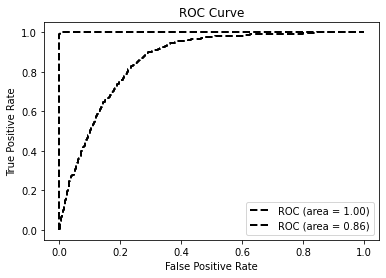

In [26]:
import lightgbm
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_curve,auc,roc_auc_score,mean_squared_error
from sklearn.model_selection import train_test_split
def model_metrics(model, x, y):
    """ 评估 """
    yhat = model.predict(x)
    yprob = model.predict_proba(x)[:,1]
    fpr,tpr,_ = roc_curve(y, yprob,pos_label=1)
    metrics = {'AUC':auc(fpr, tpr),'KS':max(tpr-fpr),
               'f1':f1_score(y,yhat),'P':precision_score(y,yhat),'R':recall_score(y,yhat)}
    
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)

    plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
    plt.title('ROC Curve')
    plt.legend(loc="lower right")


    return metrics


# 训练模型
lgb=lightgbm.LGBMClassifier(n_estimators=200, class_weight= 'balanced',metric = 'AUC')
lgb.fit(train_x, train_y)
print('train ',model_metrics(lgb,train_x, train_y))
print('test ',model_metrics(lgb,test_x,test_y))


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

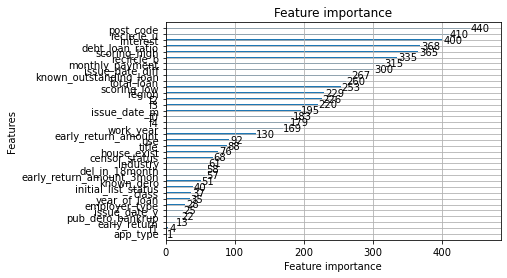

In [19]:
from lightgbm import plot_importance

plot_importance(lgb)

## 选择模型--LR逻辑回归
1、使用Toad对特征离散化、Woe编码、调节单调性 
2、LR建模；LR原理可见：

In [23]:
import toad

# 数据EDA分析
toad.detector.detect(train_bank)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
loan_id,int64,10000,0.00%,10000,1025209.5877,14386.820956,1000008.0,1000572.97,1005238.9,1025276.5,1037694.5,1045305.7,1049615.02,1049997.0
user_id,int64,10000,0.00%,10000,225209.5877,14386.820956,200008.0,200572.97,205238.9,225276.5,237694.5,245305.7,249615.02,249997.0
total_loan,float64,10000,0.00%,1632,14402.126591,8953.946807,818.181818,1599.909091,4545.454545,12272.72727,19636.36364,28000.0,39916.749999,47272.72727
year_of_loan,int64,10000,0.00%,2,3.4796,0.853965,3.0,3.0,3.0,3.0,3.0,5.0,5.0,5.0
interest,float64,10000,0.00%,1028,13.222782,4.875755,4.779,5.32,7.348,12.639,15.9855,19.866,27.489,33.979
monthly_payment,float64,10000,0.00%,6377,436.960427,261.754396,30.44,53.3074,158.122,371.525,573.83,803.687,1231.4519,1503.89
class,int64,10000,0.00%,7,1.7475,1.285344,0.0,0.0,0.0,2.0,2.0,3.0,5.0,6.0
employer_type,category,10000,0.00%,6,普通企业:46.10%,政府机构:24.74%,幼教与中小学校:10.53%,上市企业:9.58%,世界五百强:5.42%,政府机构:24.74%,幼教与中小学校:10.53%,上市企业:9.58%,世界五百强:5.42%,高等教育机构:3.63%
industry,category,10000,0.00%,14,金融业:16.29%,电力、热力生产供应业:12.48%,公共服务、社会组织:10.65%,住宿和餐饮业:9.07%,信息传输、软件和信息技术服务业:8.08%,交通运输、仓储和邮政业:4.92%,农、林、牧、渔业:4.66%,制造业:3.02%,批发和零售业:2.79%,国际组织:2.47%
work_year,int64,10000,0.00%,11,6.3087,3.694262,0.0,0.0,1.0,7.0,10.0,10.0,10.0,10.0


In [32]:
# WOE编码
combiner = toad.transform.Combiner()

# 训练数据并指定分箱方法

combiner.fit(pd.concat([train_x,train_y], axis=1), y='isDefault',method= 'chi',min_samples = 0.05,exclude=[])

# 以字典形式保存分箱结果

bins = combiner.export()

bins 

<AxesSubplot:xlabel='value', ylabel='proportion'>

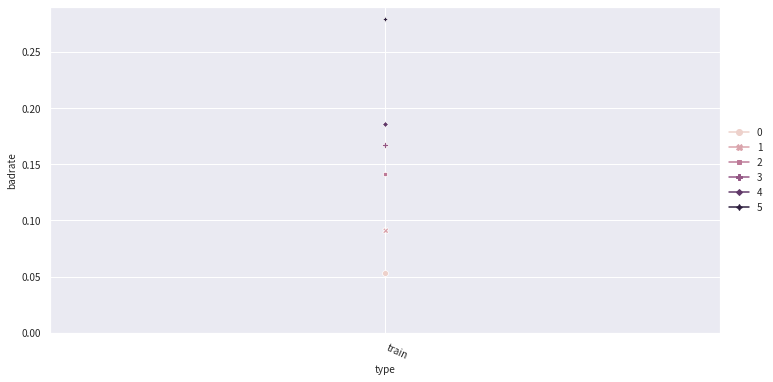

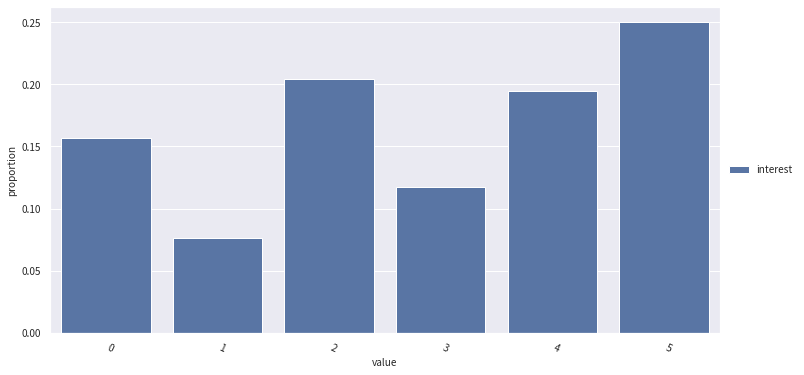

In [46]:

# 根据bad_rate图调整分箱

# 比如查看duration.in.month这个变量的分箱情况
adj_bin = {'interest': [8.24, 9.378, 11.997, 13.23, 15.984]}

c2 = toad.transform.Combiner()
c2.set_rules(adj_bin)

data_ = pd.concat([train_x,train_y], axis=1)
data_['type'] = 'train'
temp_data = c2.transform(data_[['interest','isDefault','type']])

from toad.plot import badrate_plot, proportion_plot
badrate_plot(temp_data, target = 'isDefault', x = 'type', by = 'interest')

proportion_plot(temp_data['interest'])

<AxesSubplot:xlabel='interest', ylabel='prop'>

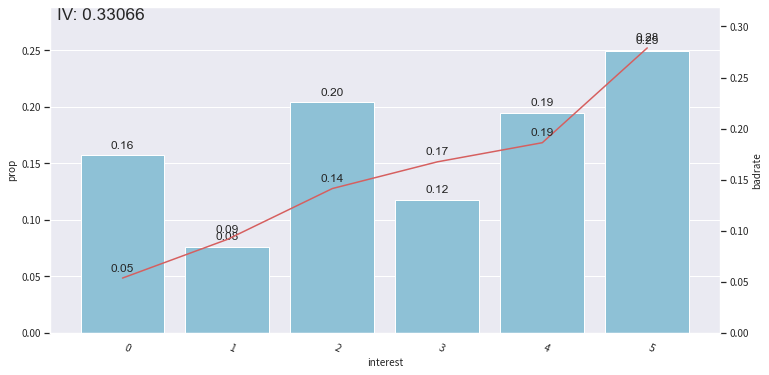

In [48]:
from toad.plot import  bin_plot,badrate_plot
bin_plot(temp_data, target = 'isDefault',x='interest')


In [51]:
#计算WOE
transer = toad.transform.WOETransformer()
binned_data = combiner.transform(pd.concat([train_x,train_y], axis=1))

#对WOE的值进行转化，映射到原数据集上。对训练集用fit_transform,测试集用transform.
data_tr_woe = transer.fit_transform(binned_data, binned_data['isDefault'],  exclude=['isDefault'])


In [52]:
data_tr_woe

,total_loan,year_of_loan,interest,monthly_payment,class,work_year,house_exist,censor_status,use,post_code,region,debt_loan_ratio,del_in_18month,scoring_low,scoring_high,known_outstanding_loan,known_dero,pub_dero_bankrup,recircle_b,recircle_u,initial_list_status,app_type,title,policy_code,f0,f1,f2,f3,f4,early_return,early_return_amount,early_return_amount_3mon,issue_date_y,issue_date_m,issue_date_diff,employer_type,industry,isDefault
7681,0.070018,-0.206792,-0.218432,0.176581,-0.385727,0.005038,0.153217,0.199333,0.061908,0.016814,-0.094961,-0.037954,-0.024233,0.131138,-0.046007,-0.152665,-0.061503,-0.046096,0.149276,0.048983,0.047130,0.0,-0.111108,0.0,-0.107512,0.002073,0.061342,-0.019844,0.045470,-2.224164,-2.514119,-2.317292,-0.049270,0.039839,-0.090276,-0.002275,-0.078604,0
9031,-0.141011,-0.206792,0.110846,-0.189388,0.195590,0.005038,0.153217,-0.265868,0.061908,0.056418,0.057429,-0.037954,-0.024233,0.117115,0.139103,-0.152665,0.260260,0.273441,0.042314,0.048983,0.047130,0.0,0.097018,0.0,0.122153,0.002073,0.061342,-0.019844,-0.089945,0.863672,1.218112,0.733899,-0.049270,-0.183238,-0.090276,0.141197,0.065954,0
3691,0.070018,-0.206792,-0.218432,0.176581,-0.385727,-0.012286,-0.159307,0.199333,-0.095765,0.016814,0.116729,-0.432534,-0.024233,-0.576811,-0.218932,-0.152665,-0.061503,-0.046096,0.042314,-0.084604,0.047130,0.0,-0.111108,0.0,0.269066,-0.021848,-0.044116,0.087364,0.045470,-2.224164,-2.021976,-2.317292,-0.326946,0.183110,-0.090276,-0.085340,0.244741,0
202,0.070018,-0.206792,0.110846,0.176581,0.362590,-0.012286,-0.159307,0.199333,0.061908,0.056418,0.110329,0.342059,-0.024233,0.117115,-0.046007,0.131564,-0.061503,-0.046096,-0.144630,0.048983,-0.034405,0.0,0.097018,0.0,0.269066,-0.021848,-0.151888,0.087364,0.045470,0.863672,1.218112,0.733899,-0.049270,0.183110,-0.090276,0.004685,-0.151970,0
5625,-0.141011,-0.206792,0.110846,-0.189388,0.195590,-0.012286,-0.159307,-0.265868,0.061908,0.016814,0.116729,-0.432534,-0.024233,-0.084799,-0.218932,0.131564,-0.061503,-0.046096,0.149276,-0.084604,0.047130,0.0,0.097018,0.0,-0.107512,0.002073,0.061342,-0.019844,-0.089945,0.863672,1.218112,0.733899,-0.040512,0.183110,0.007097,0.004685,0.065954,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0.070018,-0.206792,-0.218432,0.067831,-0.385727,0.005038,-0.159307,0.014638,0.061908,0.016814,-0.192146,-0.037954,-0.024233,0.131138,-0.046007,-0.152665,0.260260,0.273441,0.042314,-0.084604,-0.034405,0.0,0.097018,0.0,-0.107512,0.002073,0.061342,-0.019844,-0.089945,-2.224164,-2.021976,-2.317292,-0.040512,-0.183238,0.007097,0.004685,0.065954,0
4859,0.070018,-0.206792,-1.283811,0.176581,-1.215469,-0.298914,0.153217,-0.265868,-0.095765,0.016814,0.057429,-0.037954,-0.024233,0.117115,0.139103,-0.152665,-0.061503,-0.046096,-0.144630,0.048983,0.047130,0.0,-0.111108,0.0,-0.107512,0.002073,0.061342,-0.019844,-0.089945,-2.224164,-2.514119,0.733899,-0.049270,-0.209332,-0.090276,-0.002275,0.065954,0
3264,-0.141011,-0.206792,-0.218432,-0.189388,-0.385727,0.306345,0.153217,-0.265868,0.061908,0.016814,0.057429,-0.037954,-0.024233,0.131138,-0.046007,-0.152665,-0.061503,-0.046096,-0.144630,0.048983,-0.034405,0.0,0.097018,0.0,-0.107512,0.002073,0.061342,-0.019844,0.164351,-2.224164,-2.021976,0.733899,-0.049270,-0.239306,-0.090276,0.004685,0.065954,0
9845,0.070018,-0.206792,-0.218432,0.067831,-0.385727,-0.012286,0.153217,-0.265868,-0.095765,0.016814,-0.094961,-0.037954,-0.024233,0.117115,0.211503,-0.152665,-0.061503,-0.046096,0.149276,0.048983,-0.034405,0.0,-0.111108,0.0,-0.107512,0.002073,0.061342,-0.019844,0.164351,-2.224164,-2.514119,-2.317292,0.235456,-0.239306,-0.090276,0.004685,0.065954,0
